In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import GPy
from dgp_sampler import DGP_sampler

# from .context import gpr
from context import dgpr
from context import gpr
from context import ei
from context import lbfgs_search
from context import base_task

from sklearn.metrics import mean_squared_error as mse

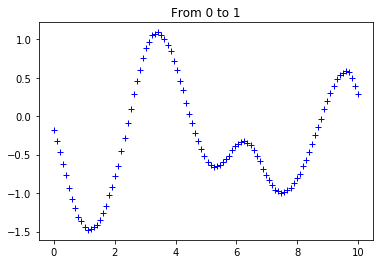

 dgp_sampler.py:61: RuntimeWarning:covariance is not positive-semidefinite.


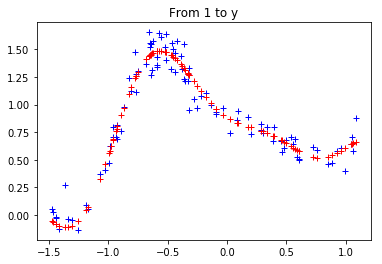

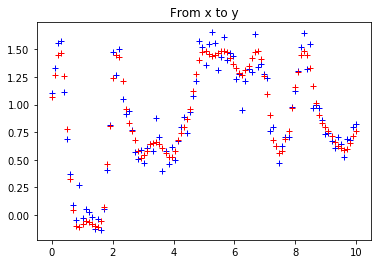

In [2]:
X = np.linspace(0,10.,100)[:,None]

DGP = DGP_sampler(X,kern_vars=np.array([1,0.9]),kern_lens=np.array([1,0.5]))
y = DGP.sample_1D(out_var=[1e-2], layer_noise=True, layer_var= [1e-4], layer_plots=True)

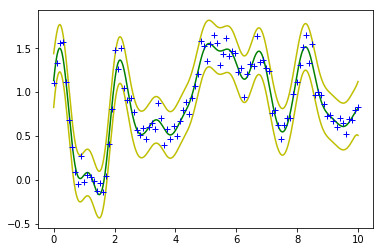

In [3]:
# Full GPs
X_test = np.linspace(0,10., 1000)[:,None]
model_gp = gpr.GPR(input_dim=DGP.input_dim)
model_gp.train(X,y)

m2,v2 = model_gp.predict(X_test, grad=False)
top2 = m2 + 2*np.sqrt(v2)
bottom2 = m2 - 2*np.sqrt(v2)
plt.plot(X_test[:], top2[:],'y')
plt.plot(X_test[:], bottom2[:],'y')
plt.plot(X_test[:],m2[:], 'g')
plt.plot(DGP.X[:],DGP.y[:], 'b+')
plt.show()

[30, 30]
iter 0 	 obj 1414.315
iter 10 	 obj 529.326
iter 20 	 obj 419.468
iter 30 	 obj 336.250
iter 40 	 obj 285.926
iter 50 	 obj 261.633
iter 60 	 obj 235.873
iter 70 	 obj 188.609
iter 80 	 obj 173.848
iter 90 	 obj 161.012
iter 100 	 obj 145.458
iter 110 	 obj 85.130
iter 120 	 obj 89.736
iter 130 	 obj 75.662
iter 140 	 obj 100.246
iter 150 	 obj 78.011
iter 160 	 obj 54.900
iter 170 	 obj 53.786
iter 180 	 obj 53.768
iter 190 	 obj 54.616
iter 200 	 obj 53.233
iter 210 	 obj 46.783
iter 220 	 obj 59.137
iter 230 	 obj 52.728
iter 240 	 obj 53.682
iter 250 	 obj 58.635
iter 260 	 obj 63.021
iter 270 	 obj 58.260
iter 280 	 obj 49.945
iter 290 	 obj 51.685
iter 300 	 obj 47.065
iter 310 	 obj 45.643
iter 320 	 obj 51.731
iter 330 	 obj 56.296
iter 340 	 obj 50.708
iter 350 	 obj 60.433
iter 360 	 obj 40.670
iter 370 	 obj 49.290
iter 380 	 obj 46.008
iter 390 	 obj 56.191
iter 400 	 obj 47.972
iter 410 	 obj 40.888
iter 420 	 obj 38.044
iter 430 	 obj 37.927
iter 440 	 obj 35.514

iter 3620 	 obj -12.992
iter 3630 	 obj -13.967
iter 3640 	 obj 3.271
iter 3650 	 obj -1.011
iter 3660 	 obj 0.979
iter 3670 	 obj -15.904
iter 3680 	 obj -1.219
iter 3690 	 obj -9.423
iter 3700 	 obj 10.163
iter 3710 	 obj -14.333
iter 3720 	 obj -12.214
iter 3730 	 obj -9.245
iter 3740 	 obj 3.646
iter 3750 	 obj -17.817
iter 3760 	 obj -16.030
iter 3770 	 obj -11.249
iter 3780 	 obj -16.343
iter 3790 	 obj -14.172
iter 3800 	 obj -13.894
iter 3810 	 obj -6.122
iter 3820 	 obj -5.036
iter 3830 	 obj -3.301
iter 3840 	 obj -8.941
iter 3850 	 obj -8.841
iter 3860 	 obj -4.899
iter 3870 	 obj -11.608
iter 3880 	 obj -4.849
iter 3890 	 obj -11.371
iter 3900 	 obj -10.117
iter 3910 	 obj -11.778
iter 3920 	 obj -24.141
iter 3930 	 obj -8.013
iter 3940 	 obj -16.837
iter 3950 	 obj -4.046
iter 3960 	 obj 3.624
iter 3970 	 obj -8.165
iter 3980 	 obj -11.376
iter 3990 	 obj -13.830


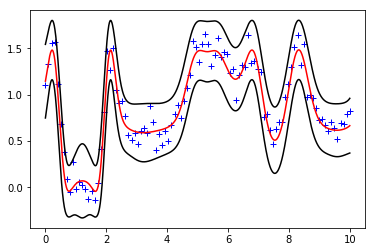

In [4]:
# AEP deepgeepees
X_test = np.linspace(0,10., 1000)[:,None]
model_aep = dgpr.DGPR(input_dim=DGP.input_dim)
model_aep.train(X,y)

m,v = model_aep.predict(X_test, grad=False)
top = m + 2*np.sqrt(v)
bottom = m - 2*np.sqrt(v)
#pdb.set_trace()


plt.figure()
plt.plot(DGP.X[:],DGP.y[:], 'b+')

plt.plot(X_test[:], top[:],'k')
plt.plot(X_test[:], bottom[:],'k')
plt.plot(X_test[:],m[:], 'r')
plt.show()


## SCORES

In [5]:
y_pred_gp = model_gp.predict(X, grad=False)[0]
y_pred_aep = model_aep.predict(X, grad=False)[0]
print np.sqrt(mse(y_true=y, y_pred=y_pred_gp))
print np.sqrt(mse(y_true=y, y_pred=y_pred_aep))

0.100300628516
0.119666162644


In [7]:
dir(model_gp)

['X',
 'Y',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'get_best',
 'get_noise',
 'input_dim',
 'kernel',
 'model',
 'noise_var',
 'predict',
 'sample_functions',
 'start_point',
 'train',
 'update']